In [32]:
import su
import numpy as np

def get_max_amplitude(data, perc=100):
    sorted_array = np.sort(np.abs(data), axis=None)
    tam = len(sorted_array)
    index = round((perc/100)*tam)
    max_amplitude = sorted_array[index - 1]
    return max_amplitude

def scaled_data(data, max_amplitude, dx):
    #Correcting amplitudes for all data
    new_data = []
    scale = dx/max_amplitude
    #scale = 0.05
    print(scale)
    for trace in data:    
        corrected_data = np.array([x  if abs(x) <= max_amplitude else max_amplitude*np.sign(x) for x in trace])
        new_data.append(scale*corrected_data)
        
    return new_data

In [3]:
filename = "traces.su"
data = su.readSU(filename)

[('tracl', '<i4'), ('tracr', '<i4'), ('fldr', '<i4'), ('tracf', '<i4'), ('ep', '<i4'), ('cdp', '<i4'), ('cdpt', '<i4'), ('trid', '<i2'), ('nvs', '<i2'), ('nhs', '<i2'), ('duse', '<i2'), ('offset', '<i4'), ('gelev', '<i4'), ('selev', '<i4'), ('sdepth', '<i4'), ('gdel', '<i4'), ('sdel', '<i4'), ('swdep', '<i4'), ('gwdep', '<i4'), ('scalel', '<i2'), ('scalco', '<i2'), ('sx', '<i4'), ('sy', '<i4'), ('gx', '<i4'), ('gy', '<i4'), ('counit', '<i2'), ('wevel', '<i2'), ('swevel', '<i2'), ('sut', '<i2'), ('gut', '<i2'), ('sstat', '<i2'), ('gstat', '<i2'), ('tstat', '<i2'), ('laga', '<i2'), ('lagb', '<i2'), ('delrt', '<i2'), ('muts', '<i2'), ('mute', '<i2'), ('ns', '<u2'), ('dt', '<u2'), ('gain', '<i2'), ('igc', '<i2'), ('igi', '<i2'), ('corr', '<i2'), ('sfs', '<i2'), ('sfe', '<i2'), ('slen', '<i2'), ('styp', '<i2'), ('stas', '<i2'), ('stae', '<i2'), ('tatyp', '<i2'), ('afilf', '<i2'), ('afils', '<i2'), ('nofilf', '<i2'), ('nofils', '<i2'), ('lcf', '<i2'), ('hcf', '<i2'), ('lcs', '<i2'), ('hcs', 

In [4]:
su_header = su.readSUheader(filename)
data['cdp']

array([  1,   2,   2, ..., 267, 267, 268], dtype=int32)

In [29]:
#Collecting traces from a specific cdp
cdp_index = 123
traces = []
traces_index = []
for i in range(0, len(data)):
    if(data['cdp'][i] == cdp_index):
        traces.append(data['trace'][i])
        traces_index.append(i)
    

In [31]:
#dx = 20      
dx = 20
#Scaling data
max_amplitude = get_max_amplitude(traces, perc=90)
scaled_traces = scaled_data(traces, max_amplitude, dx)

2319.78122271


/home/abd/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [30]:
data['offset'][traces_index[1]] - data['offset'][traces_index[2]]

-20

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


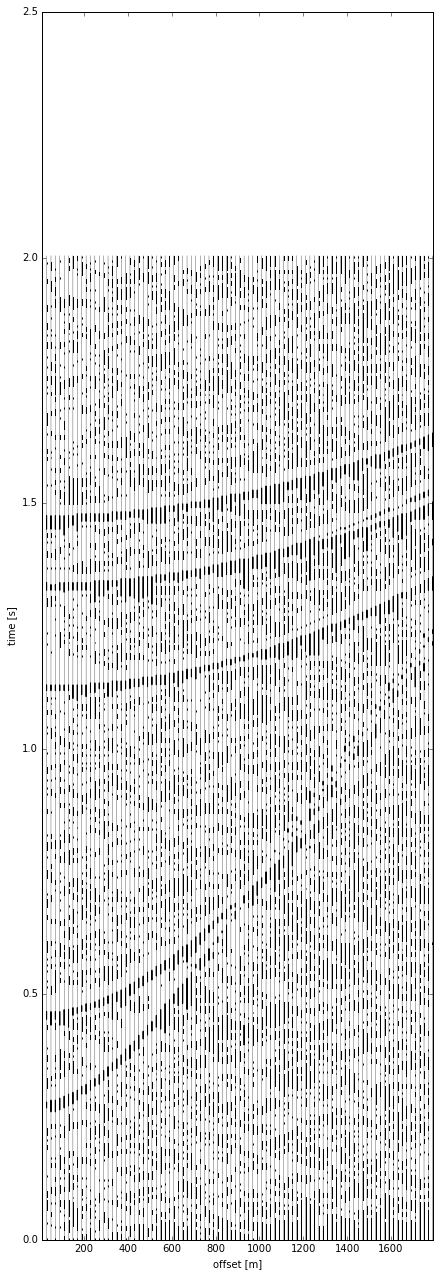

In [25]:
#Now plot!
#avo: amplitude versus offset visualization
%pylab inline
#Metade do tamanho anterior
pylab.rcParams['figure.figsize'] = (7,22)
#pylab.rcParams['figure.figsize'] = (7,22)

#Number of samples in a trace
nsamples =  su_header['ns'][0]
#Sample interval (microseconds) between samples in a trace for all traces
interval = su_header['dt'][0]*pow(10,-6)
#Time vector
y = np.linspace(0, nsamples*interval, nsamples)

#Visualizing traces for a specific cdp
#Assuming number of samples and sample interval is the same for all traces
for index, trace in enumerate(traces):
    trace_index = traces_index[index]
    #Offset = gx - sx
    offset = data['offset'][trace_index]
    x = trace + offset 
    plt.plot(x, y, 'k-', linewidth=0.3)
    #Paint black all positive amplitudes
    plt.fill_betweenx(list(y),offset,list(x), where = x >= offset, color='black')
    
    
    
plt.xlim([min( data['offset']),max( data['offset'])])
plt.xlabel('offset [m]')
plt.ylabel('time [s]')
plt.show()
    